In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Sur toutes les données histo

In [ ]:
base = pd.read_csv("/Users/victorhuynh/Downloads/histos_sieges.csv")

In [ ]:
base.head()

,Unnamed: 0,Jour,Horaire théorique,Horaire bloc,Compagnie,Code IATA compagnie,Code OACI compagnie,Numéro de vol,Faisceau facturation,Pays,...,Plateforme code,Libellé plateforme,Aérogare,Libellé aérogare,Terminal,Libellé terminal,Nombre de mouvements réalisés,Nombre de vol atterris décollés,Nombre de passagers réalisés,Sièges Corrections_ICI
0,43,2012/04/01 00:00:00,2012/04/01 13:40:00,2012/04/01 16:05:00,CUBANA,CU,CUB,CU445,International,CUBA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,241,262.0
1,89,2012/02/02 00:00:00,2012/02/02 20:30:00,2012/02/02 20:49:00,TWIN JET,T7,TJT,T75016,National,FRANCE,...,ORY,Orly,ORYO,ORY OUEST,ORYW,ORY OUEST,1,1,13,19.0
2,322,2012/02/11 00:00:00,2012/02/11 11:30:00,2012/02/11 11:20:00,CORSAIR INTL,SS,CRL,SS943,International,ETATS-UNIS USA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,168,350.0
3,560,2012/02/20 00:00:00,2012/02/20 11:25:00,2012/02/20 10:45:00,CORSAIR INTL,SS,CRL,SS943,International,ETATS-UNIS USA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,266,350.0
4,563,2012/02/19 00:00:00,2012/02/19 10:30:00,2012/02/19 10:57:00,CUBANA,CU,CUB,CU444,International,CUBA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,249,262.0


## Répartition des vols par faisceaux

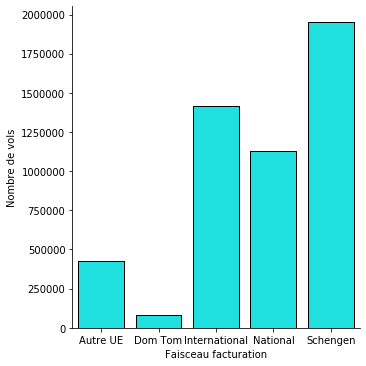

In [ ]:
df = base.groupby('Faisceau facturation').aggregate({'Jour' : 'count'}).reset_index()
df = df.rename(columns={'Jour': 'Nombre de vols'})
sns.catplot(x='Faisceau facturation', y='Nombre de vols', edgecolor="black", data=df,kind = "bar", color = "cyan")

## Saisonalité des vols

Mois par mois

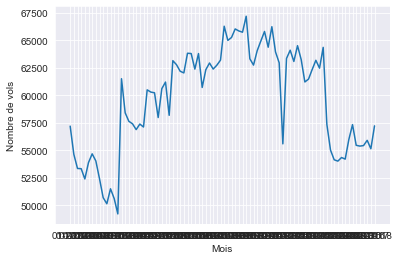

In [ ]:
sns.set_style("darkgrid") #Choix du style de fond de nos graphiques
base = base.astype({'Jour': 'datetime64[ns]'})
base['Mois'] = base['Jour'].dt.strftime('%m-%Y')
df = base.groupby('Mois').aggregate({'Numéro de vol' : 'count'})
df = df.rename(columns={'Numéro de vol': 'Nombre de vols'}).reset_index()
g = sns.lineplot(x='Mois', y='Nombre de vols', data=df)

Jour par jour

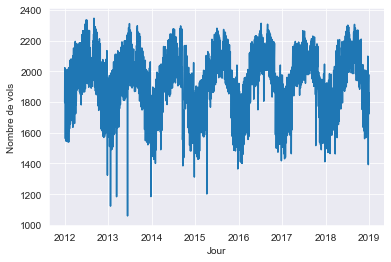

In [ ]:
df = base.groupby('Jour').aggregate({'Numéro de vol' : 'count'})
df = df.rename(columns={'Numéro de vol': 'Nombre de vols'}).reset_index()
g = sns.lineplot(x='Jour', y='Nombre de vols', data=df)

## Taux de remplissage

In [ ]:
base['Taux de remplissage réel'] = base['Nombre de passagers réalisés']/base['Sièges Corrections_ICI']

In [ ]:
faisceaux =['Schengen', 'International', 'Autre UE', 'National', 'Dom Tom']

In [ ]:
df_Schengen = base[base['Faisceau facturation'] == 'Schengen'].reset_index(drop = True)
df_Int = base[base['Faisceau facturation'] == 'International'].reset_index(drop = True)
df_UENS = base[base['Faisceau facturation'] == 'Autre UE'].reset_index(drop = True)
df_Nat = base[base['Faisceau facturation'] == 'National'].reset_index(drop = True)
df_DT = base[base['Faisceau facturation'] == 'Dom Tom'].reset_index(drop = True)

# Sur 2016 seulement

In [ ]:
base2016 = pd.read_csv(r"/Users/victorhuynh/Downloads/histo_2016.csv")

In [ ]:
base2016['Taux de remplissage réel'] = base2016['Nombre de passagers réalisés']/base2016['Sièges Corrections_ICI']

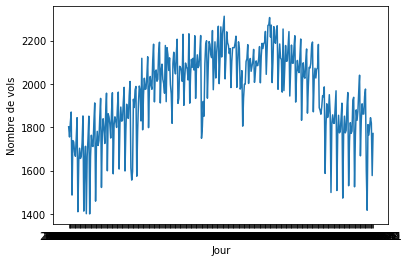

In [ ]:
df = base2016.groupby('Jour').aggregate({'Numéro de vol' : 'count'})
df = df.rename(columns={'Numéro de vol': 'Nombre de vols'}).reset_index()
g = sns.lineplot(x='Jour', y='Nombre de vols', data=df)

## Comparaison entre LF% de FQMs et taux de remplissage réel en 2016

Text(0.5, 1.0, 'Tous faisceaux compris')

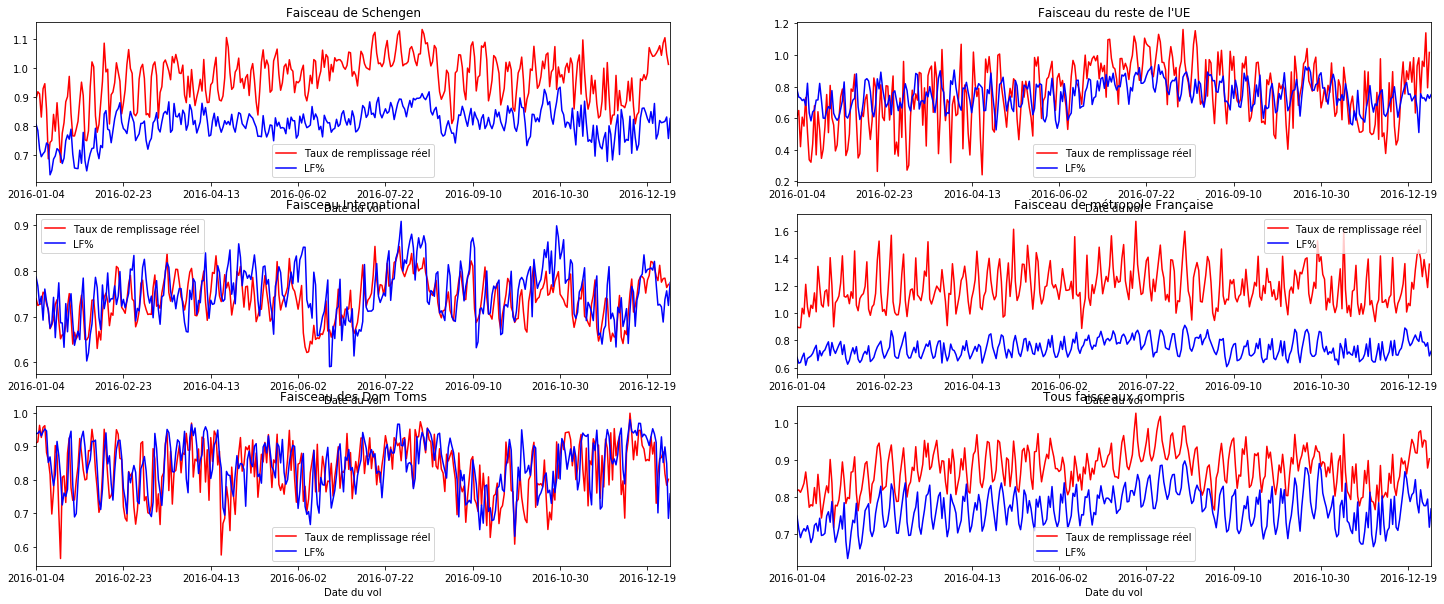

In [ ]:
colors = ['red','blue'] 
faisceaux2 =['SCH', 'INT', 'CEE', 'MTP', 'DTM'] #Codage des faisceaux dans fqms
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(25,10))

base2016[base2016['Faisceau facturation'] == 'Schengen'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'SCH'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[1])
axes[0,0].legend()
axes[0,0].set_title('Faisceau de Schengen')

base2016[base2016['Faisceau facturation'] == 'International'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'INT'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[1])
axes[1,0].legend()
axes[1,0].set_title('Faisceau International')

base2016[base2016['Faisceau facturation'] == 'Autre UE'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'CEE'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[1])
axes[0,1].legend()
axes[0,1].set_title("Faisceau du reste de l'UE")

base2016[base2016['Faisceau facturation'] == 'National'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'MTP'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[1])
axes[1,1].legend()
axes[1,1].set_title('Faisceau de métropole Française')

base2016[base2016['Faisceau facturation'] == 'Dom Tom'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'DTM'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[1])
axes[2,0].legend()
axes[2,0].set_title('Faisceau des Dom Toms')

base2016.groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[0])
fqms2016.groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[1])
axes[2,1].legend()
axes[2,1].set_title('Tous faisceaux compris')

In [ ]:
def compare_histo_fqms(agregation_fqms, agregation_histo,variable_fqms, variable_histo, func_agreg_fqms,func_agreg_histo):
  colors = ['red','blue'] 
  faisceaux2 =['SCH', 'INT', 'CEE', 'MTP', 'DTM'] #Codage des faisceaux dans fqms
  fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(25,10))

  base2016[base2016['Faisceau facturation'] == 'Schengen'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'SCH'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[1])
  axes[0,0].legend()
  axes[0,0].set_title('Faisceau de Schengen')

  base2016[base2016['Faisceau facturation'] == 'International'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'INT'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[1])
  axes[1,0].legend()
  axes[1,0].set_title('Faisceau International')

  base2016[base2016['Faisceau facturation'] == 'Autre UE'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'CEE'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[1])
  axes[0,1].legend()
  axes[0,1].set_title("Faisceau du reste de l'UE")

  base2016[base2016['Faisceau facturation'] == 'National'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'MTP'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[1])
  axes[1,1].legend()
  axes[1,1].set_title('Faisceau de métropole Française')

  base2016[base2016['Faisceau facturation'] == 'Dom Tom'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'DTM'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[1])
  axes[2,0].legend()
  axes[2,0].set_title('Faisceau des Dom Toms')

  base2016.groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[0])
  fqms2016.groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[1])
  axes[2,1].legend()
  axes[2,1].set_title('Tous faisceaux compris')
